In [1]:
from keras.datasets import cifar10
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, _), (X_test, _) = cifar10.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3)
X_test = X_test.reshape(len(X_test), X_test.shape[1],X_test.shape[2],3)
print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 303s 2us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# total 60000
# The encoding process
input_img = Input(shape=(32, 32, 3))  

# encoding 
x = Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# The decoding process
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


autoencoder

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 16)          2320

In [23]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())     # 32x32x32
model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))      # 16x16x32
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 16x16x32
model.add(BatchNormalization())     # 16x16x32
model.add(UpSampling2D())
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 32x32x32
model.add(BatchNormalization())
model.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   # 32x32x3

model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_48 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 conv2d_49 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 up_sampling2d_16 (UpSamplin  (None, 32, 32, 32)      

In [24]:
model.fit(X_train, X_train,
                epochs=1,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

2022-11-22 20:07:45.943956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.6551

2022-11-22 20:07:55.610143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 11s 52ms/step - loss: 0.0085 - accuracy: 0.6551 - val_loss: 0.0234 - val_accuracy: 0.6171


In [27]:
model.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
196/196 [==============================] - 10s 49ms/step - loss: 0.0019 - accuracy: 0.7744 - val_loss: 0.0049 - val_accuracy: 0.7344
Epoch 2/10
196/196 [==============================] - 9s 47ms/step - loss: 0.0012 - accuracy: 0.8049 - val_loss: 0.0013 - val_accuracy: 0.7913
Epoch 3/10
196/196 [==============================] - 9s 48ms/step - loss: 9.2120e-04 - accuracy: 0.8234 - val_loss: 8.6056e-04 - val_accuracy: 0.8396
Epoch 4/10
196/196 [==============================] - 10s 48ms/step - loss: 7.3687e-04 - accuracy: 0.8375 - val_loss: 6.8892e-04 - val_accuracy: 0.8503
Epoch 5/10
196/196 [==============================] - 9s 47ms/step - loss: 6.4030e-04 - accuracy: 0.8474 - val_loss: 5.9436e-04 - val_accuracy: 0.8529
Epoch 6/10
196/196 [==============================] - 9s 48ms/step - loss: 5.9835e-04 - accuracy: 0.8538 - val_loss: 5.1787e-04 - val_accuracy: 0.8503
Epoch 7/10
196/196 [==============================] - 9s 48ms/step - loss: 5.4770e-04 - accuracy: 0.8582 - v

In [28]:
predicted = model.predict(X_test)

313/313 [==============================] - 1s 5ms/step


In [10]:
predicted
# predicted()

array([[[[0.58562326, 0.42303884, 0.24533314],
         [0.6022432 , 0.38665804, 0.20084147],
         [0.6484442 , 0.42341363, 0.20635854],
         ...,
         [0.55095935, 0.39193672, 0.16597061],
         [0.50094116, 0.33295926, 0.15286784],
         [0.468274  , 0.3443845 , 0.18373099]],

        [[0.61975694, 0.45177194, 0.19326487],
         [0.60175616, 0.37158552, 0.16246738],
         [0.6475458 , 0.4217596 , 0.18492272],
         ...,
         [0.5381867 , 0.34312785, 0.1406621 ],
         [0.50683385, 0.3262265 , 0.1370393 ],
         [0.45703632, 0.31813237, 0.14445022]],

        [[0.6447483 , 0.4547071 , 0.18381582],
         [0.6187171 , 0.3966326 , 0.16000548],
         [0.6405488 , 0.43312034, 0.17499316],
         ...,
         [0.5510987 , 0.38276133, 0.14874323],
         [0.50976247, 0.34594825, 0.12560152],
         [0.49229637, 0.34386903, 0.13661431]],

        ...,

        [[0.27109772, 0.5008395 , 0.69635165],
         [0.1737509 , 0.39580834, 0.5871398 ]

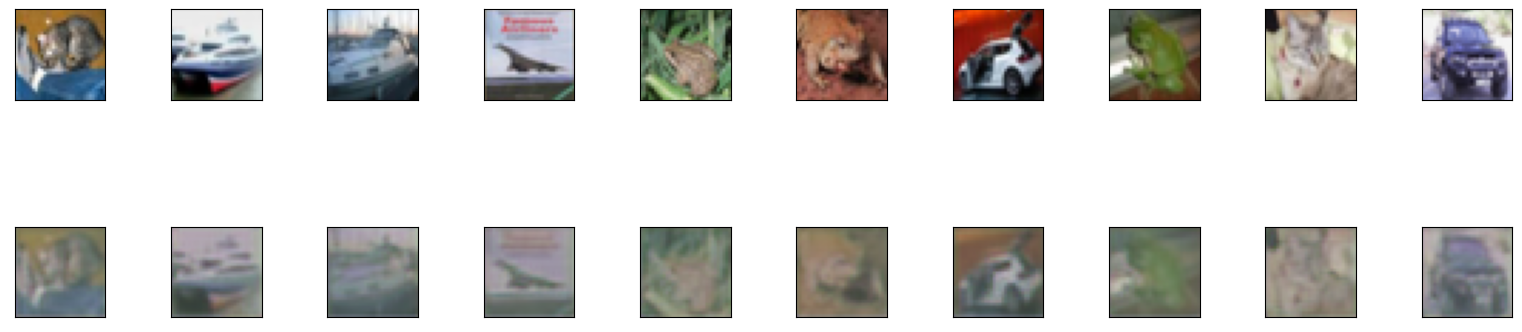

In [26]:
# below is predicted, above is image from dataset

plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

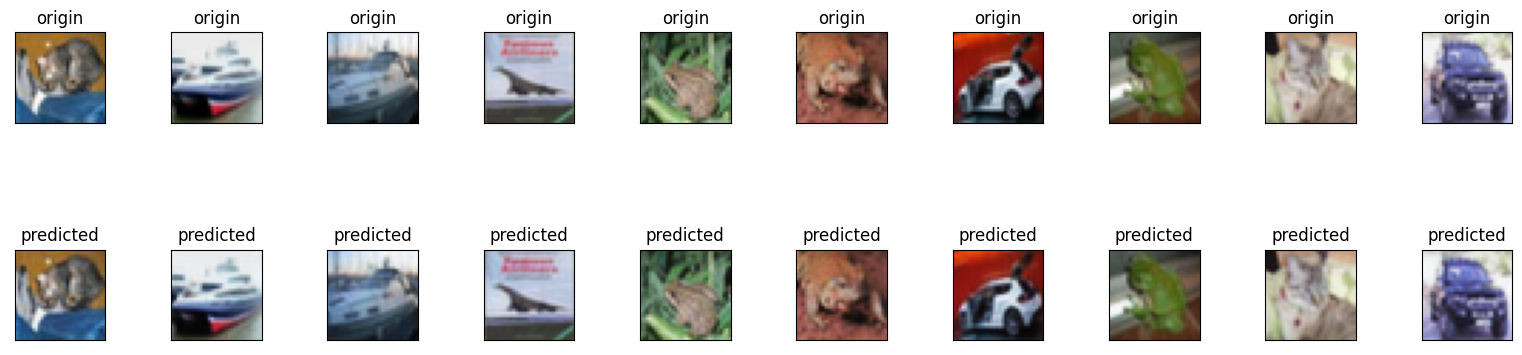

In [31]:
# below is predicted, above is image from dataset
plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32,3))
    plt.title('origin')
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    plt.title('predicted')
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

In [ ]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = x_test[1]
compressed = decoded_imgs[1]
value = PSNR(original, compressed)
print(f"PSNR value is {value} dB")